### Regression

Regression is a supervised statistical technique that is used to predict continuous quantities from a given sample; it is able to *estimate* the interesting quantity.

It consists of two steps:
- Training set used to fit the model.
- Validation/Test set are used to evaluate the model.

MSE is a measure of errors but the RMSE is useful for our purposes because it shares the same unit of measurement of data. Also $R^2$ can be useful.

Supervised algorithms can be broadly divided into two types: *classification* and *regression*.

Before starting with the training and validation process, some steps should be done, such as exploration, preprocessing, feature engineering and encoding.

#### My first machine learning pipeline

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [38]:
PATH = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv'


bike_data = pd.read_csv(PATH)
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


The data consists of the following columns:
- Instant: numerical index.
- dteday: date on which data was observed.
- season: encoded value for season.
- yr: 0 -> 2011, 1 -> 2012.
- month: calendar month
- holiday: binary value
- weekday: the day of the week on which the data was collected
- workingday:  binary value
- weathersit: a categorical value indicating the weather situation.
- temp: temperature (normalized)
- atemp: the feels-like temperature
- hum: humidity level (normalized)
- windspeed: windspeed (normalized)
- rentals: the number of cycles rentals recorded.

In [39]:
bike_data['day'] = pd.to_datetime(bike_data.dteday).dt.day

In [40]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


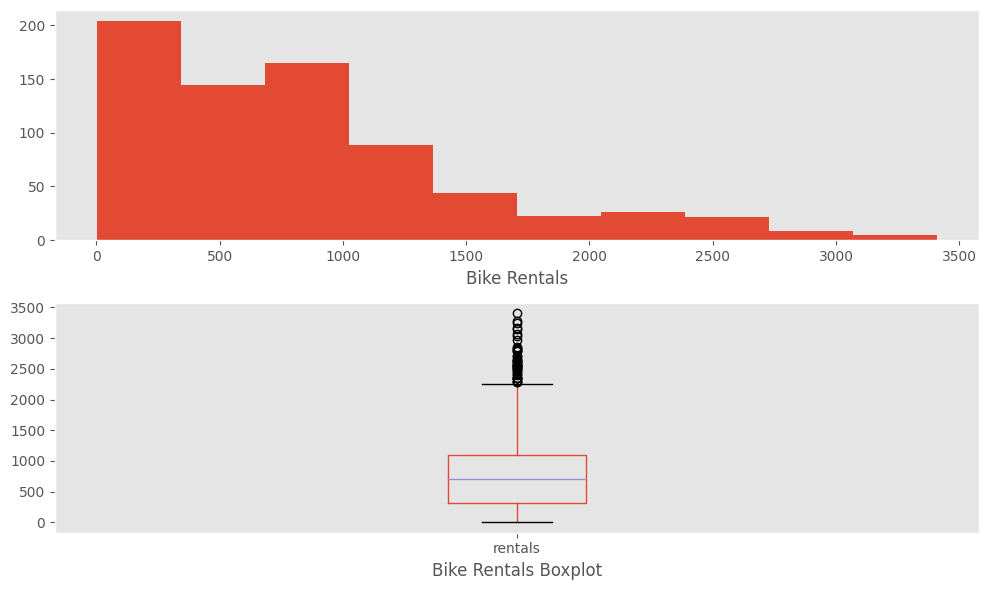

In [41]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))

bike_data.rentals.hist(ax = ax[0])
ax[0].grid(False)
ax[0].set_xlabel('Bike Rentals')

bike_data[['rentals']].boxplot(ax = ax[1])
ax[1].grid(False)
ax[1].set_xlabel('Bike Rentals Boxplot')

plt.tight_layout();

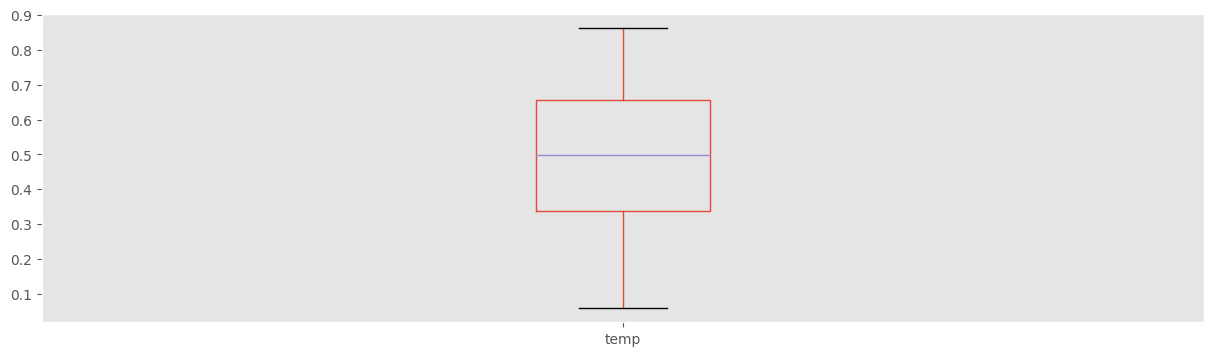

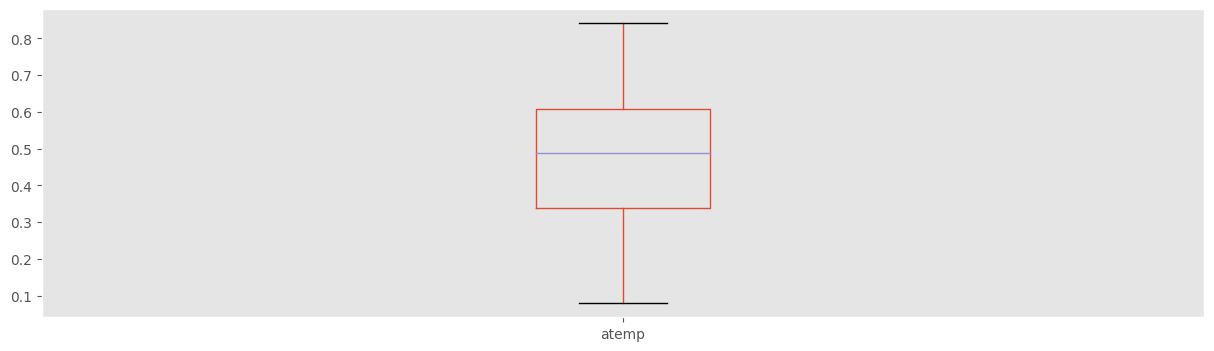

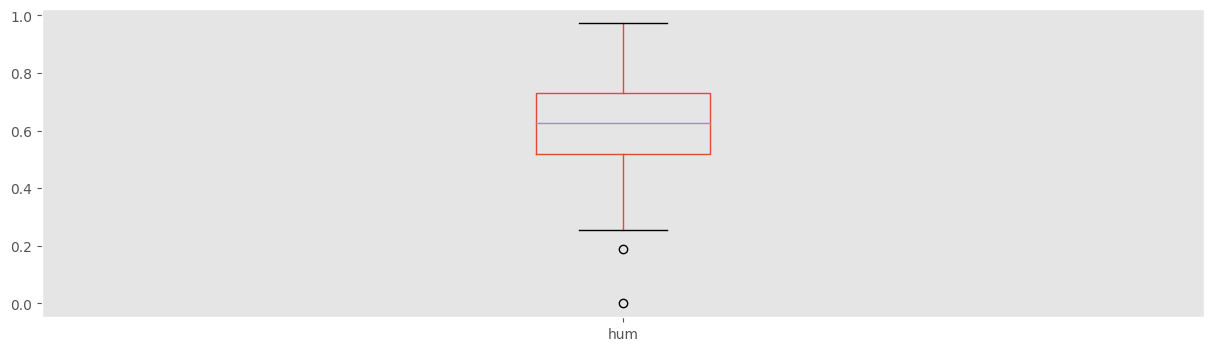

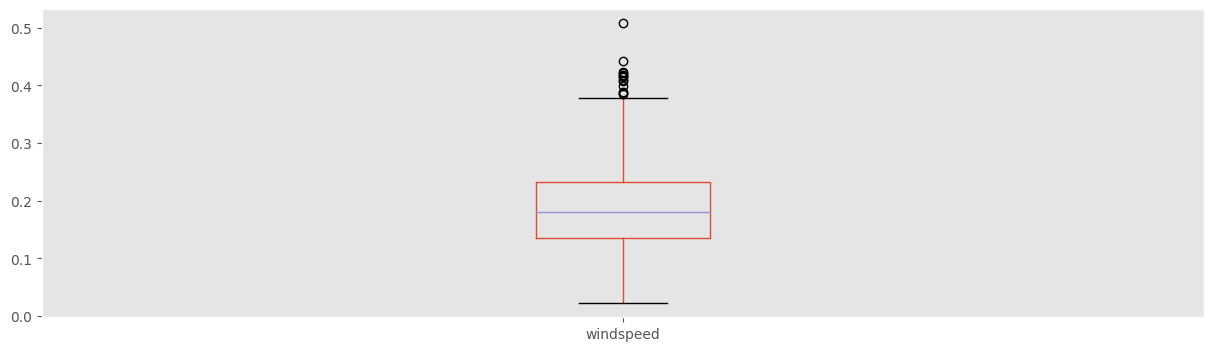

In [42]:
for col in numeric_features:
    fig = plt.figure(figsize = (15, 4))
    ax = fig.gca()
    bike_data[[col]].boxplot(ax = ax)
    ax.grid(False)

plt.show()

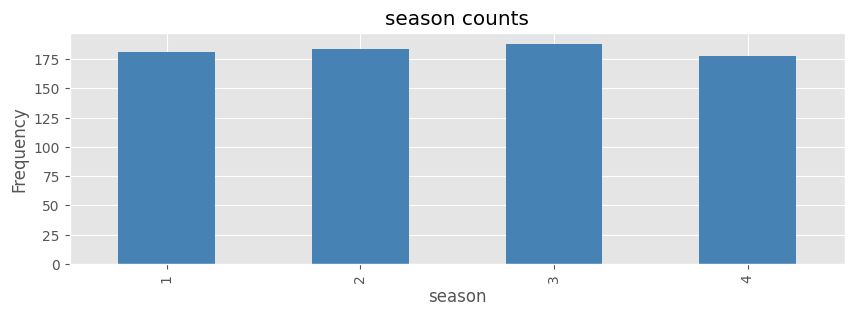

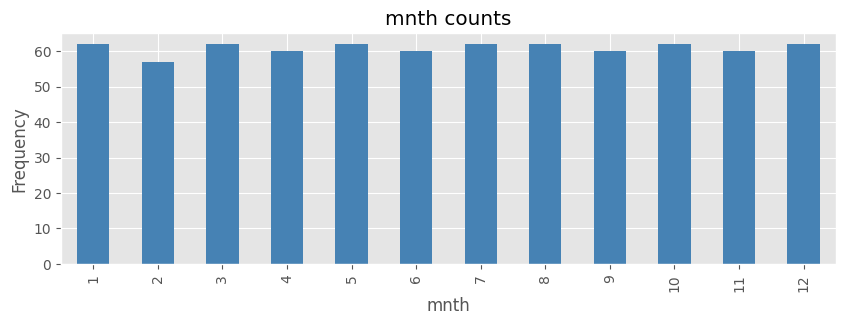

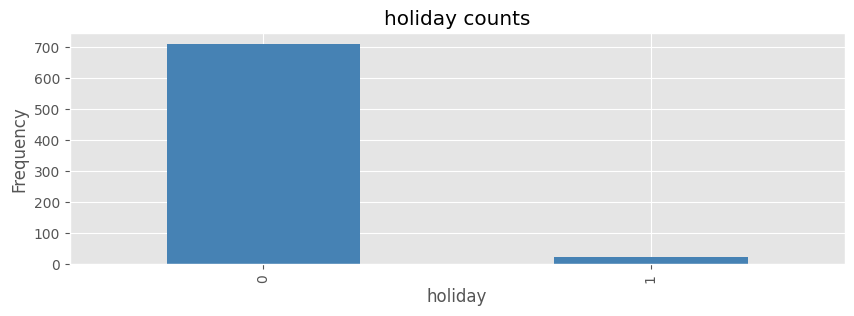

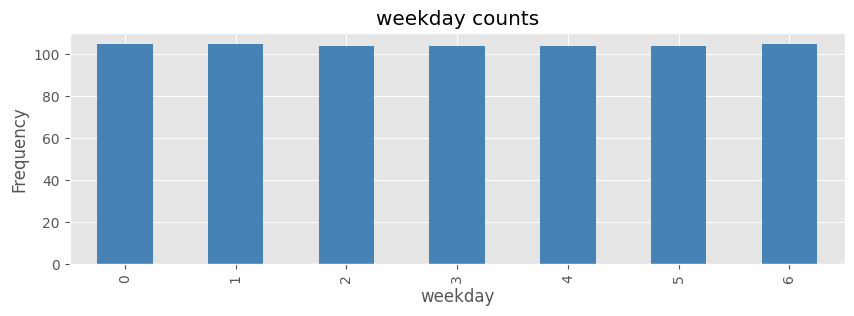

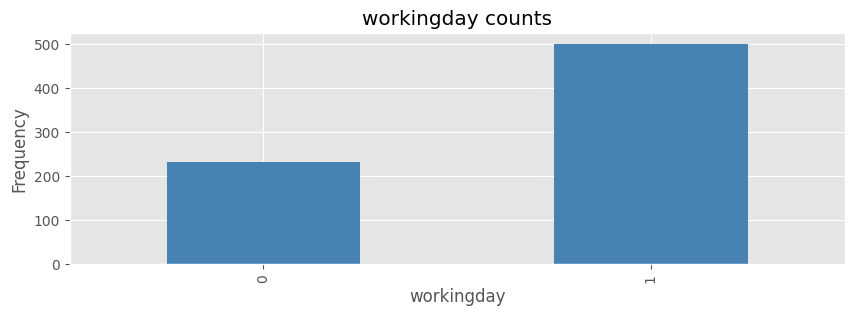

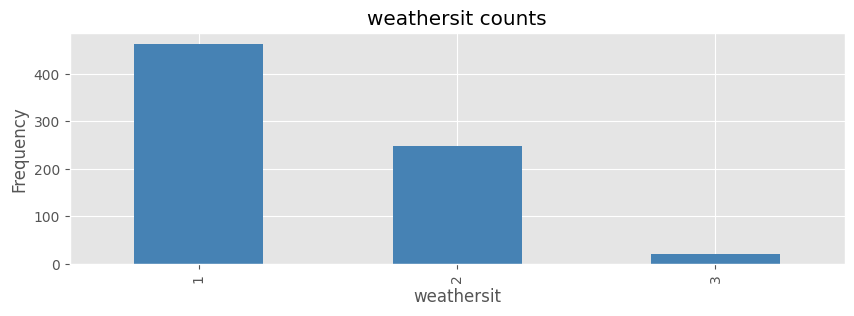

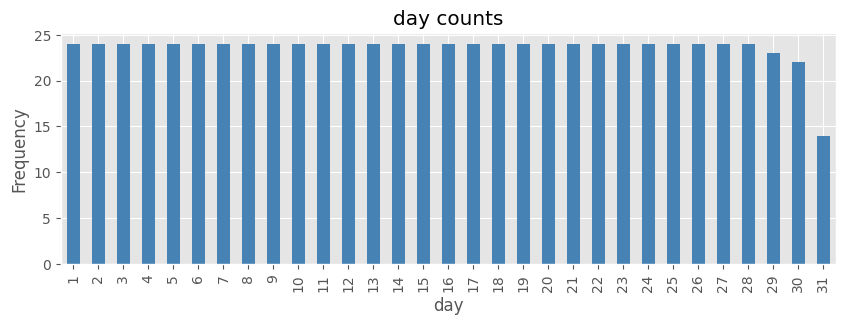

In [43]:
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']

for col in categorical_features:
    counts = bike_data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(10, 3))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

In [44]:
import numpy as np

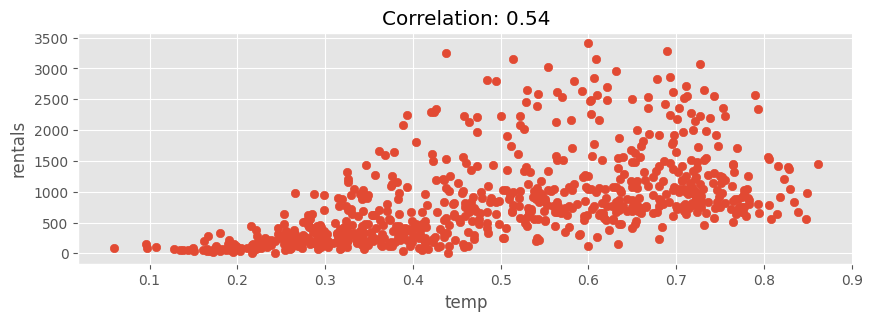

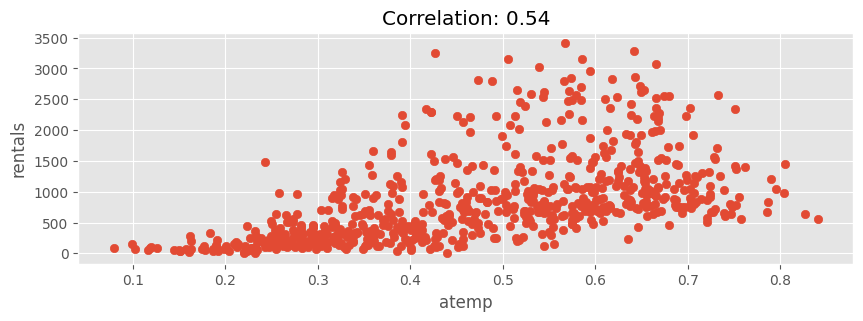

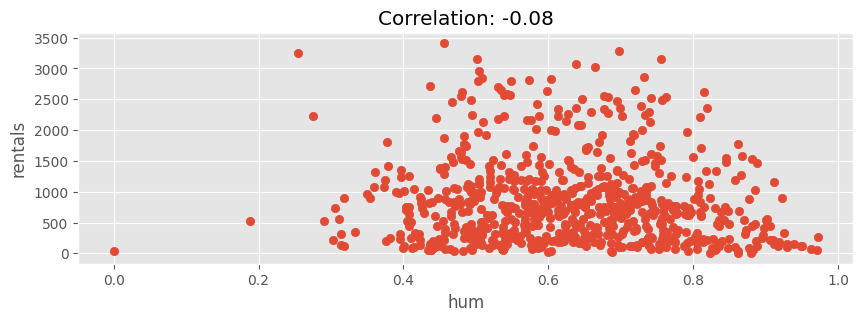

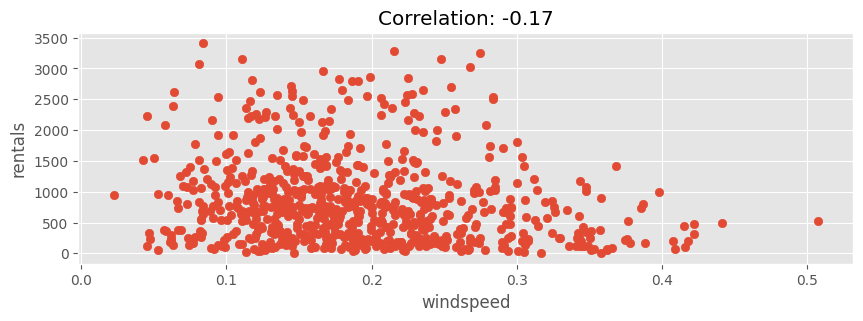

In [45]:
for col in numeric_features:
    fig = plt.figure(figsize = (10, 3))
    ax = fig.gca()
    plt.scatter(bike_data[col], bike_data['rentals'])
    plt.title('Correlation: {:.2f}'.format(bike_data[col].corr(bike_data['rentals'])))
    plt.xlabel(col)
    plt.ylabel('rentals')

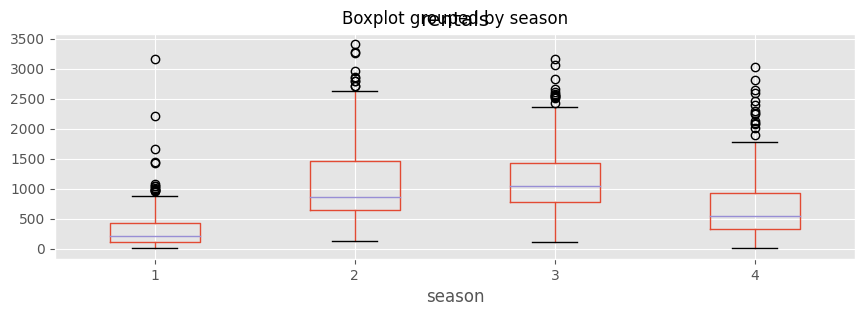

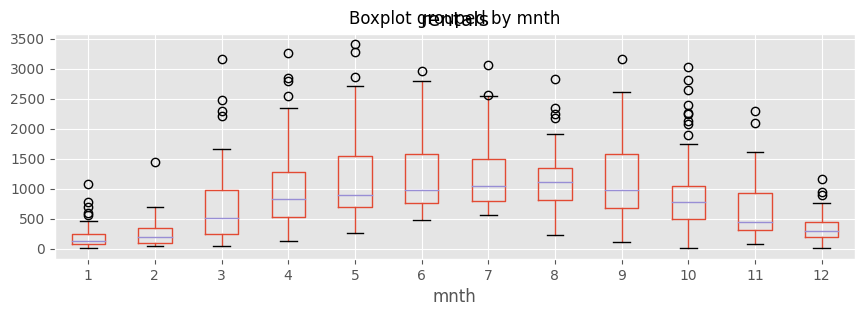

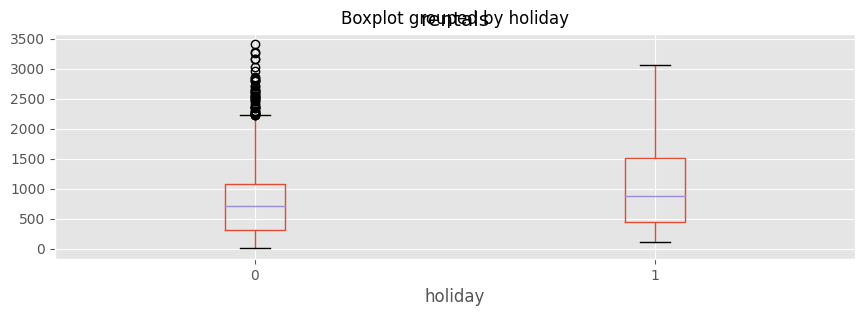

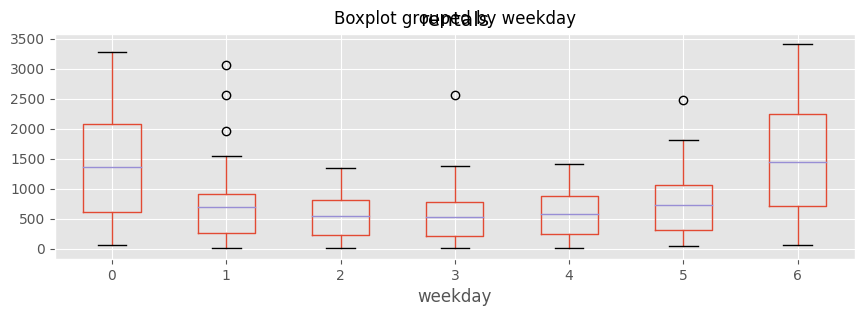

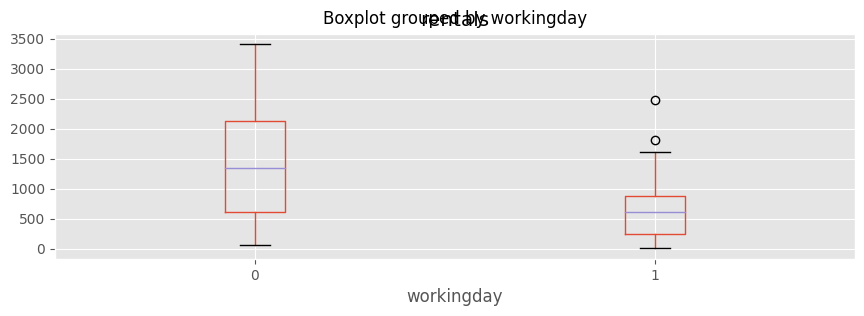

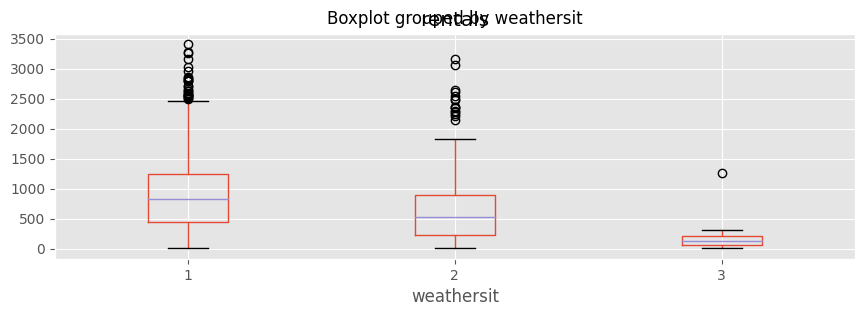

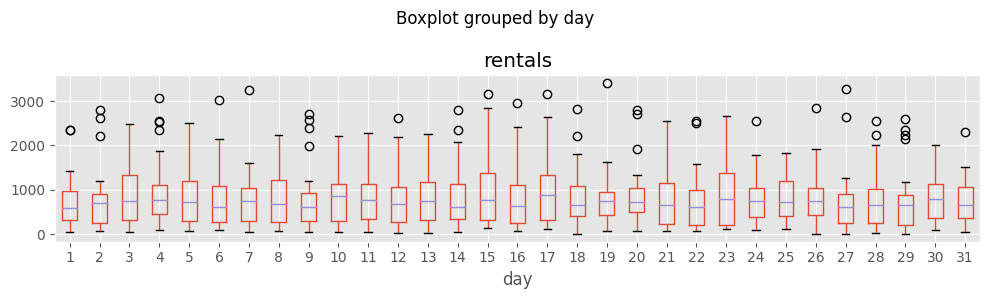

In [46]:
for col in categorical_features:
    fig = plt.figure(figsize = (10, 3))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    # ax.set_title('Label by ' + col)
plt.tight_layout()
plt.show();

We have seen some features that can be potentially useful for the model. So, instead of performing a featyre engineering step, the above features can be exploited.

In [47]:
categorical_features[:-1]

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [48]:
X = bike_data[numeric_features + categorical_features[:-1]].values
y = bike_data['rentals'].values

In order to fit the model, data are randomly splitted in a train and validation set. It ensures the presence of the same distribution between the two sets.

In Scikit-Learn, training algorithms are encapsulated in estimators, and in this case we'll use the LinearRegression estimator to train a linear regression mode

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_val.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [146]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
print(model)

LinearRegression()


In [147]:
pred_val = model.predict(X_val)

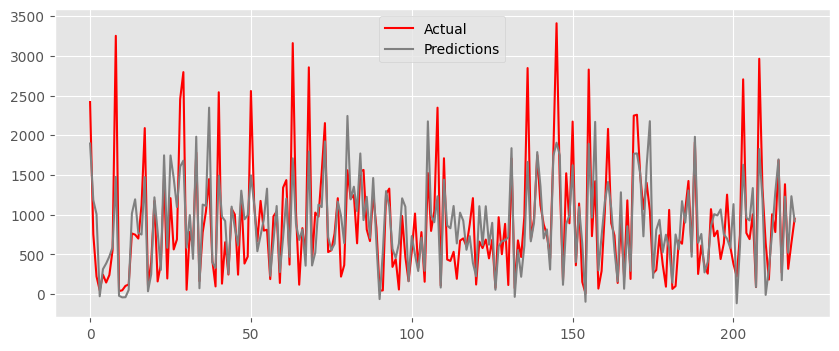

In [148]:
plt.figure(figsize = (10, 4))
plt.plot(y_val, color = 'red', label = 'Actual')
plt.plot(pred_val, color = 'grey', label = 'Predictions')
plt.legend();

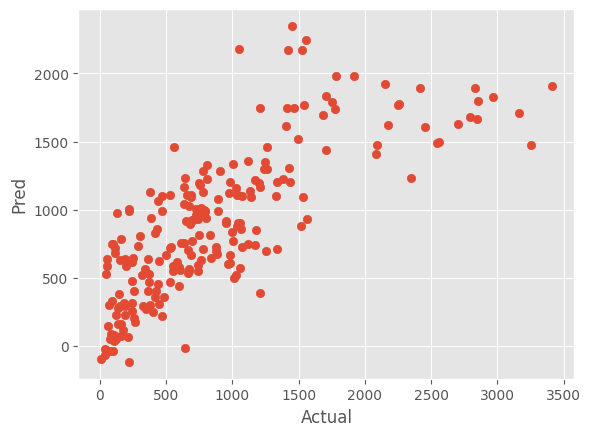

In [149]:
plt.scatter(y_val, pred_val)
plt.xlabel('Actual')
plt.ylabel('Pred');

In [150]:
pred = model.predict(X)

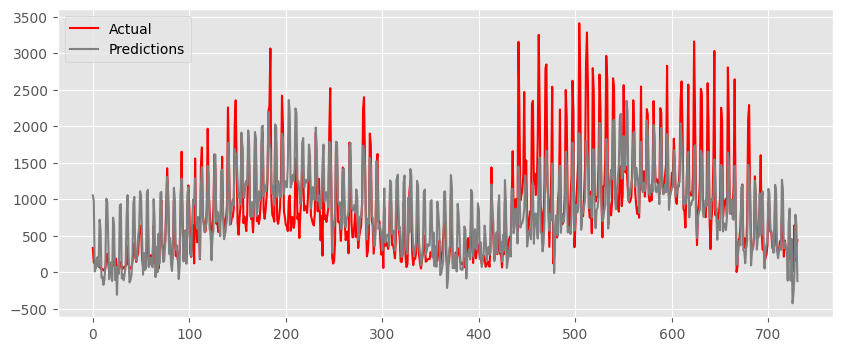

In [151]:
plt.figure(figsize = (10, 4))
plt.plot(y, color = 'red', label = 'Actual')
plt.plot(pred, color = 'grey', label = 'Predictions')
plt.legend();

In [152]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val, pred_val)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_val, pred_val)
print("R2:", r2)

MSE: 201972.55947035592
RMSE: 449.4135728595165
R2: 0.6040454736919191


#### Model benchmarking

This is a simple machine learning pipeline.

In addition, more models can be exploited for the abovementioned problem, like the following ones:
- Linear regression with lasso and ridge regularization.
- Decision trees
- Ensamble algorithm

So, let's try  some other models!

In [153]:
from sklearn.linear_model import Lasso

metrics = {}
metrics['Linear'] = rmse

In [154]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
pred_val = model.predict(X_val)

mse = mean_squared_error(y_val, pred_val)
rmse = np.sqrt(mse)
metrics['Lasso'] = rmse
print("RMSE:", rmse)

RMSE: 448.5037496489128


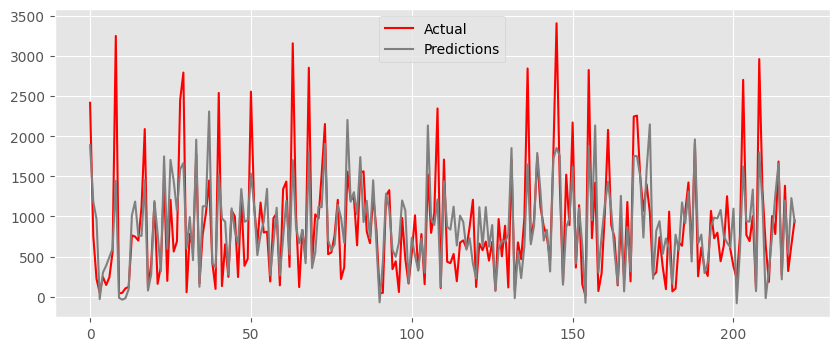

In [155]:
plt.figure(figsize = (10, 4))
plt.plot(y_val, color = 'red', label = 'Actual')
plt.plot(pred_val, color = 'grey', label = 'Predictions')
plt.legend();

In [156]:
from sklearn.linear_model import Ridge

model = Ridge().fit(X_train, y_train)
pred_val = model.predict(X_val)

mse = mean_squared_error(y_val, pred_val)
rmse = np.sqrt(mse)
metrics['Ridge'] = rmse
print("RMSE:", rmse)

RMSE: 445.714428812558


In [157]:
from sklearn.linear_model import ElasticNet

model = ElasticNet().fit(X_train, y_train)
pred_val = model.predict(X_val)

mse = mean_squared_error(y_val, pred_val)
rmse = np.sqrt(mse)
metrics['ElasticNet'] = rmse
print("RMSE:", rmse)

RMSE: 625.2770873185575


In [158]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor().fit(X_train, y_train)
pred_val = model.predict(X_val)

mse = mean_squared_error(y_val, pred_val)
rmse = np.sqrt(mse)
metrics['DecisionTreeRegressor'] = rmse
print("RMSE:", rmse)

RMSE: 495.2025435020594


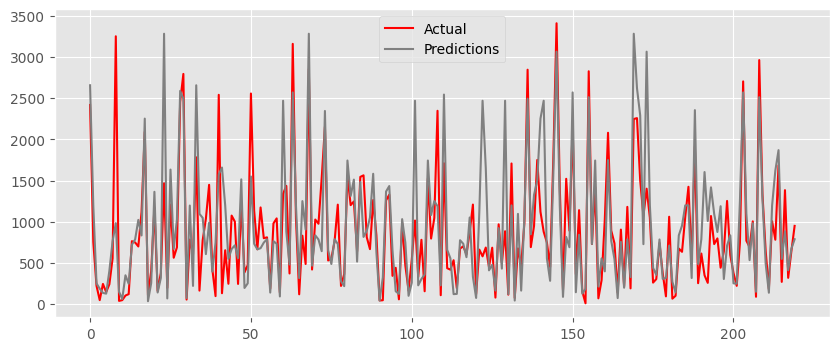

In [159]:
plt.figure(figsize = (10, 4))
plt.plot(y_val, color = 'red', label = 'Actual')
plt.plot(pred_val, color = 'grey', label = 'Predictions')
plt.legend();

Ensemble algorithms work by combining results derived from some models:
- _Bagging_: aggregate the results.
- _Boosting_: create a sequence of models that build on one another to improve predictive performance

In [160]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)
pred_val = model.predict(X_val)

mse = mean_squared_error(y_val, pred_val)
rmse = np.sqrt(mse)
metrics['RandomForestRegressor'] = rmse
print("RMSE:", rmse)

RMSE: 341.03115474449487


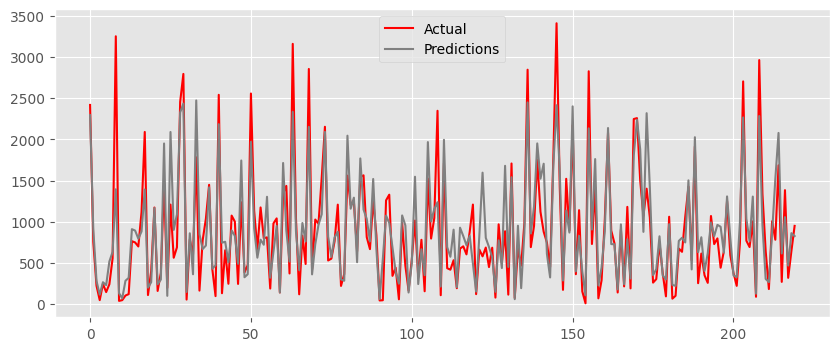

In [161]:
plt.figure(figsize = (10, 4))
plt.plot(y_val, color = 'red', label = 'Actual')
plt.plot(pred_val, color = 'grey', label = 'Predictions')
plt.legend();

In [162]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)
pred_val = model.predict(X_val)

mse = mean_squared_error(y_val, pred_val)
rmse = np.sqrt(mse)
metrics['GradientBoostingRegressor'] = rmse
print("RMSE:", rmse)

RMSE: 322.45868275098803


In [164]:
metrics

{'Linear': 449.4135728595165,
 'Lasso': 448.5037496489128,
 'Ridge': 445.714428812558,
 'ElasticNet': 625.2770873185575,
 'DecisionTreeRegressor': 495.2025435020594,
 'RandomForestRegressor': 341.03115474449487,
 'GradientBoostingRegressor': 322.45868275098803}

#### Model improvement

Models can be improved through several tasks:
- Hyperparameter tuning. In Machine Learning, parameters are variables determined from data, while hyperparameters are set a priori.
- Scaling features in order to prevent some feature to be more important than another during the fitting procedure. You can scale nuerical data with Min-Max Scaler or Normalization step.
- Ordinal Encoding and One-hot encoding.

All of these steps can be encapsulated in a pipeline which is useful for applying to the valudation set the same rpocedure hold for the training taking into account the statistical distirbution anf category wncoding of the training set.

Since XGBoost was the best model, let's optimize its hyperparameters.

In [172]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'squared_er

In [187]:
# Hyperparameter tuning.

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

model = GradientBoostingRegressor()
params = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 150]
}

score = make_scorer(r2_score)
gridsearch = GridSearchCV(model, params, scoring = score, cv = 3, return_train_score = True)
gridsearch.fit(X_train, y_train)

model = gridsearch.best_estimator_
print(gridsearch.best_params_)
pred_val = model.predict(X_val)

mse = mean_squared_error(y_val, pred_val)
rmse = np.sqrt(mse)
metrics['GradientBoostingRegressor'] = rmse
print("RMSE:", rmse)

{'learning_rate': 0.1, 'n_estimators': 100}
RMSE: 322.72740912036386


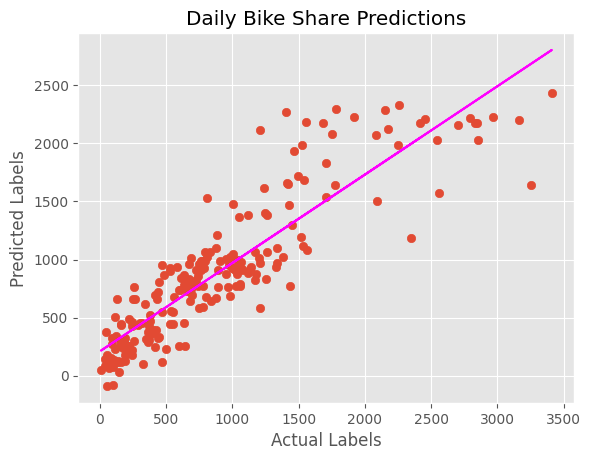

In [124]:
# Plot predicted vs actual
model = gridsearch.best_estimator_
pred_val = model.predict(X_val)
plt.scatter(y_val, pred_val)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_val, pred_val, 1)
p = np.poly1d(z)
plt.plot(y_val, p(y_val), color='magenta')
plt.show()

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define preprocessing for numeric columns (scale them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())
                           ]
                    )
model = pipeline.fit(X_train, (y_train))

print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 181840.0948803827
RMSE: 426.4271272801283
R2: 0.6435139069337479


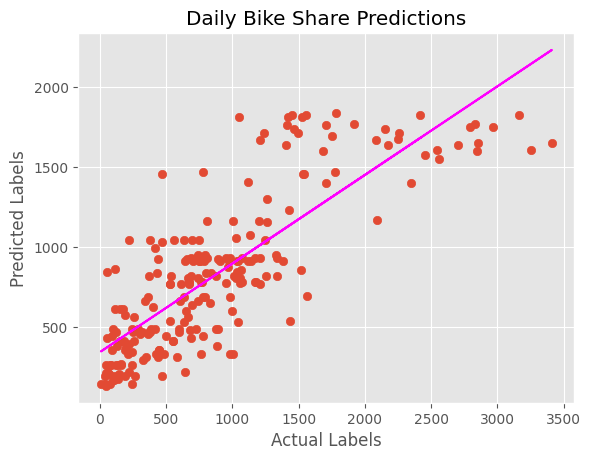

In [51]:
# Get predictions
predictions = model.predict(X_val)

# Display metrics
mse = mean_squared_error(y_val, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_val, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_val, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_val, predictions, 1)
p = np.poly1d(z)
plt.plot(y_val,p(y_val), color='magenta')
plt.show()

In [52]:
# New observations.
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
model.predict(X_new)

array([433.52062445])